In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def importImage(imdir):
    
    im_array = plt.imread(imdir)
    im_array = (im_array * 255).astype(np.int64)
    im_array = im_array[:,:,:3]

    height = np.shape(im_array)[0]
    width = np.shape(im_array)[1]
    
    channels = np.shape(im_array)[2]
    
    return im_array, width, height, channels

In [3]:
image_dir = "./wallpaper.png"
image0, width, height, channels = importImage(image_dir)
print("image : ", np.shape(image0))

image :  (922, 1920, 3)


In [4]:
data = np.reshape(image0, (height*width, 3))
data0 = np.copy( data )
print("data : ", np.shape(data0))

data :  (1770240, 3)


In [5]:
def assign(data0, means):
    # 1) get distances from each point to each centroid: array (width*height,k)
    #    (element, dist to centroid i)
    dists = np.zeros( (width*height,k), dtype="int64" )
    for i in range(k):
        dists[:,i] = np.sqrt( np.sum( np.power( (data0 - means[i]), 2 ), axis = 1 ) )
    
    # 2) get closest
    data1 = np.zeros( (width*height,3), dtype="int64" )
    data1 = means[ np.argmin( dists, axis=1 ) ]
    
    return data1

In [6]:
def update( curr_data, original_data, curr_means ):
    new_means = []
    for a in range(k):
        sums = np.sum( np.where( curr_data == curr_means[a], original_data, 0 ), axis=0 )
        elements = np.count_nonzero( np.where( curr_data == curr_means[a], original_data, 0 ), axis=0 )
        new_means.append( np.divide( sums, elements ).astype(np.uint16) )
    
    return np.asarray( new_means, dtype="int64" )

k = 15 

means :
[[ 22  40  54]
 [ 38  65  84]
 [ 42  48  38]
 [ 97  94 101]
 [115  85  49]
 [  7  31  65]
 [187 177  79]
 [ 68  37  43]
 [ 55  52  73]
 [177 178 112]
 [ 31  34  43]
 [117 114 131]
 [119 124 117]
 [117  99  75]
 [ 48  68  93]] 



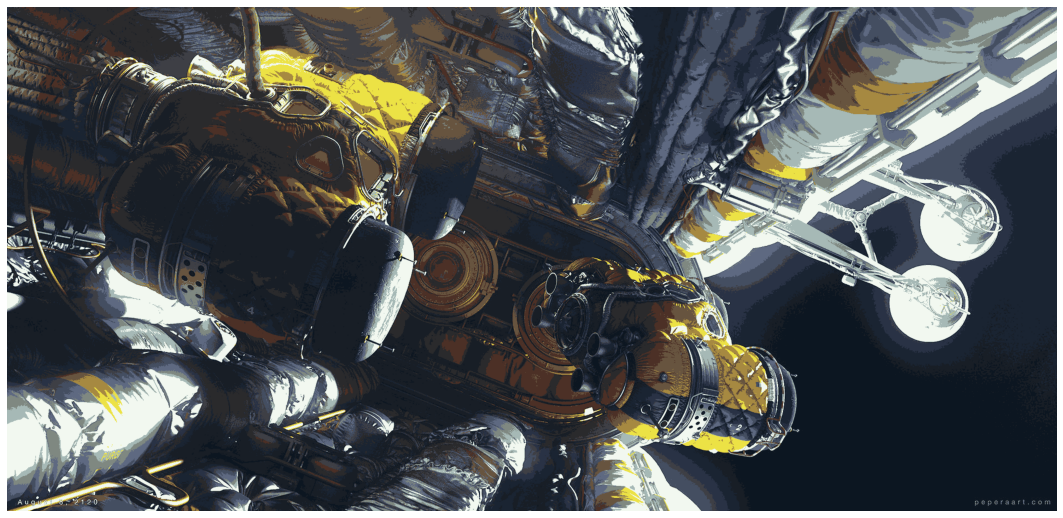

In [7]:
k = 15
print("k =", k, "\n")

means = data0[np.random.randint(0, height*width, size=k),:]
means0 = np.copy( means )
print("means :")
print(means0, "\n")

max_iterations = 10
i = 0
while i < max_iterations:
    data = assign(data0, means)
    means = update(data, data0, means)
    i += 1

image = np.reshape( data, (height, width, 3) )

#f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
#ax1.imshow(image0, aspect = "equal")
#ax2.imshow(image, aspect = "equal")

fig = plt.figure(figsize=(15,7), frameon=False)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(image, aspect='equal')
fig.savefig("wallpaper-v2.png")